<a href="https://colab.research.google.com/github/NAKSHATRA3010/TECHQKONNECT-INTERNSHIP-TASKS/blob/main/CROP_RECOM_SYS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
recipe_data = pd.read_csv("/content/Crop_recommendation.xlsx")

UnicodeDecodeError: ignored

In [ ]:
recipe_data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [ ]:
recipe_data.tail()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central
254,Pinaca,"Brown rice, fennel seeds, grated coconut, blac...",vegetarian,-1,-1,sweet,dessert,Goa,West


In [ ]:
recipe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [ ]:
recipe_data.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [ ]:
recipe_data.shape

(255, 9)

In [ ]:
recipe_data["diet"].unique()
recipe_data.diet.value_counts()

vegetarian        226
non vegetarian     29
Name: diet, dtype: int64

In [ ]:
recipe_data.name = recipe_data.name.str.strip() 
recipe_data.name = recipe_data.name.str.lower()

In [ ]:
recipe_data.flavor_profile.value_counts()


spicy     133
sweet      88
-1         29
bitter      4
sour        1
Name: flavor_profile, dtype: int64

In [ ]:
recipe_data.course.value_counts()

main course    129
dessert         85
snack           39
starter          2
Name: course, dtype: int64

In [ ]:
recipe_data.state.value_counts()

Gujarat            35
Punjab             32
Maharashtra        30
West Bengal        24
-1                 24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Karnataka           6
Rajasthan           6
Telangana           5
Bihar               3
Goa                 3
Manipur             2
Jammu & Kashmir     2
Madhya Pradesh      2
Uttarakhand         1
Tripura             1
Nagaland            1
NCT of Delhi        1
Chhattisgarh        1
Haryana             1
Name: state, dtype: int64

In [ ]:
recipe_data.region.value_counts()

West          74
South         59
North         49
East          31
North East    25
-1            13
Central        3
Name: region, dtype: int64

In [ ]:
recipe_data[recipe_data.region.isna()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
110,panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


In [ ]:
recipe_data.region.fillna("North", inplace = True)

In [ ]:
recipe_data[recipe_data.region.isna()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region


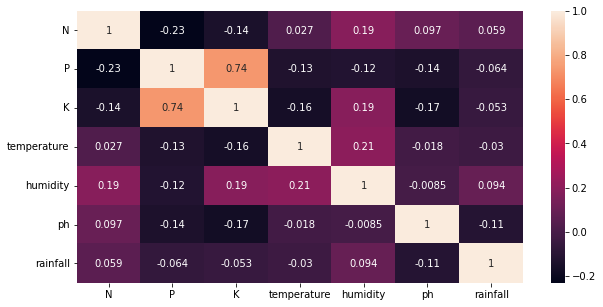

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.heatmap(crop_data.corr(), annot=True)

In [ ]:
crop_data["label"].nunique()

22

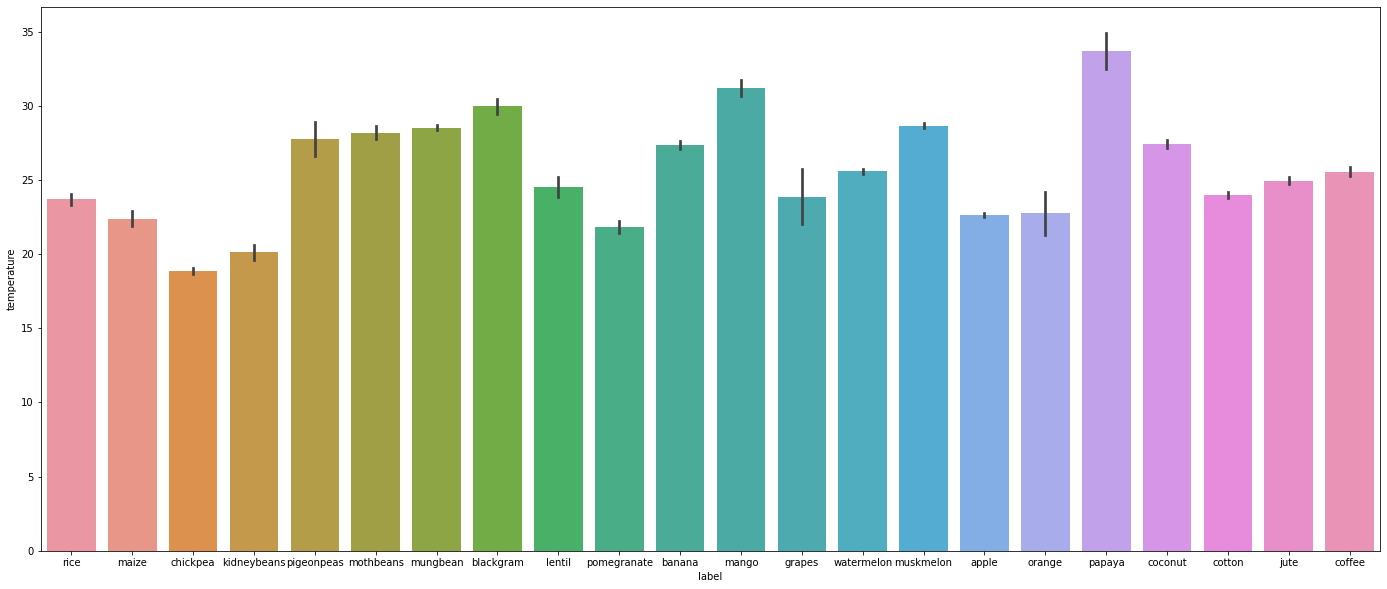

In [ ]:
fig= plt.figure(figsize=(24,10))
sns.barplot(data=crop_data, x="label", y="temperature")
plt.show()


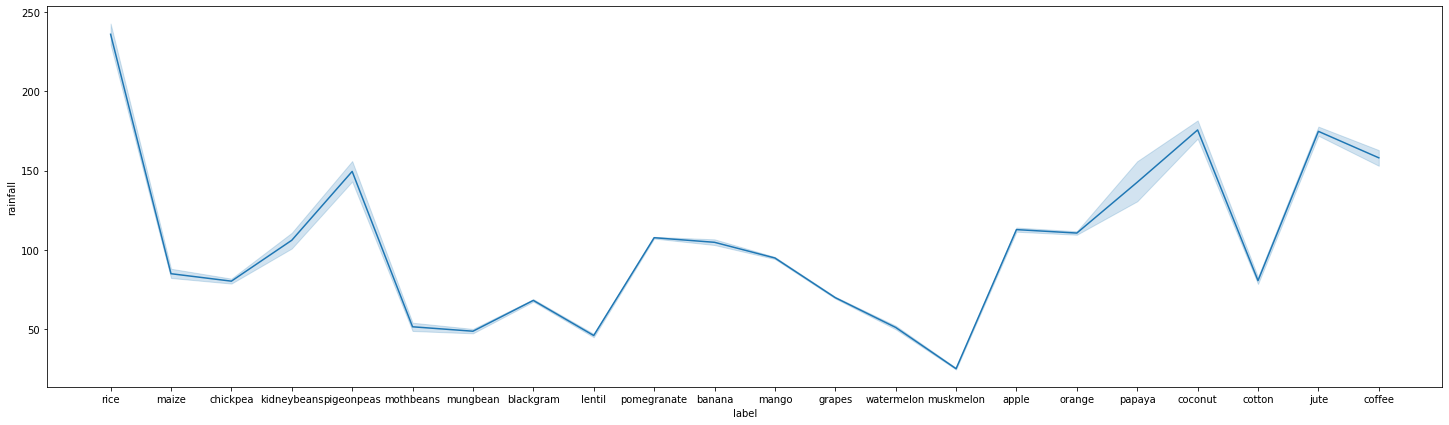

In [ ]:
fig= plt.figure(figsize=(25,7))
sns.lineplot(data=crop_data, x="label", y="rainfall")
plt.show()


In [ ]:
X= crop_data.drop(columns=["label"])
Y= crop_data["label"]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 120.4 KB


In [ ]:
Y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [ ]:
!pip install scikit-learn scipy matplotlib
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=0, test_size=0.3)

In [ ]:
knn= KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
predictions = knn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
model = print(confusion_matrix(predictions, Y_test))
model

[[28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  1  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  4  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 22  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 35  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [ ]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       1.00      1.00      1.00        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        30
        jute       0.83      0.94      0.88        31
 kidneybeans       0.87      1.00      0.93        26
      lentil       0.96      1.00      0.98        22
       maize       1.00      0.96      0.98        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      0.97      0.99        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    

In [ ]:
print("ENTER YOUR OWN DATA")
N=int(input("Enter Nitrogen : "))
P=int(input("Enter Phosphorous : "))
K=int(input("Enter Potassium : "))
temp = float(input("Enter temperature : "))
humidity =float(input("Enter humidity : "))
ph=float(input("Enter ph value : "))
rainfall=float(input("Enter rainfall amount : "))

userinput = [N,P,K,temp,humidity,ph,rainfall]

result =knn.predict([userinput])[0]
print(result)


ENTER YOUR OWN DATA
Enter Nitrogen : 56
Enter Phosphorous : 78
Enter Potassium : 34
Enter temperature : 87.8
Enter humidity : 66.
Enter ph value : 34.8
Enter rainfall amount : 23.67
lentil


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
5

5